In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import astropy as ap
from astropy.table import Table
from astropy import units as u
from astropy.coordinates import SkyCoord
import healpy as hp
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
mpl.style.use('/home/apizzuto/Nova/python3/scripts/novae_plots.mplstyle')

Notes on values in the table: Peak time is Optical peak date. $\Delta T$ is time in days for nova to decrease by 2 mag in optical

In [3]:
tab = Table.read('/home/apizzuto/Nova/source_list/appendix.tex')
df = tab.to_pandas()
coords = SkyCoord(frame="galactic", l=df['$l$']*u.degree, b=df['$b$']*u.degree)
equatorial = coords.icrs
df['ra'] = equatorial.ra.deg
df['dec'] = equatorial.dec.deg
df['gamma'] = [~np.char.startswith(fl, '$<$') for fl in df['Flux']] 
df = df.replace(['-'], np.nan)
df[u'$t_2$'] = df[u'$t_2$'].astype(float)

In [4]:
df.head()

,Name,$l$,$b$,Peak Time,$\Delta T$,Peak,$t_2$,TS$_{max}$,Flux,Reference,ra,dec,gamma
0,V1212 Cen,313.95,-3.47,2008-08-30,15.5,8.4,28.0,3.1,$<$0.9,CBET 1497 \citep{CBET1497},218.758390,-64.102928,False
1,V1309 Sco,359.79,-3.13,2008-09-06,11.5,7.1,8.0,4.1,$<$1.0,"CBET 1496 \citep{CBET1496}, IAUC 8972 \citep{I...",269.385152,-30.713217,False
2,V1721 Aql,40.97,-0.08,2008-09-22,-8.5,14.0,6.0,2.8,$<$3.0,IAUC 8989 \citep{IAUC8989},286.615462,7.112112,False
3,QY Mus,305.33,-4.86,2008-09-30,-8.5,8.0,48.0,0.3,$<$0.6,IAUC 8990 \citep{IAUC8990},199.144498,-67.614616,False
4,XMMU J115113.3-623730,296.07,-0.56,2008-11-23,-12.5,10.5,NaN,1.5,$<$1.0,ATel 2746 \citep{ATel2746},177.798979,-62.626419,False


In [5]:
pivs = [('Name', 1), ('Date', 15), ('Variable', 32), ('RA', 44), 
        ('Dec', 60), ('Disc. Mag', 75), ('Max Mag.', 84), ('Min Mag.', 92), 
        ('T3', 104), ('Class', 111), ('Obscure xid', 119), ('Discoverer', 141), ('Refs', 182), ('', -1)]
with open('/home/apizzuto/Nova/source_list/galnovae.txt', 'r') as f:
    lines = f.readlines()
    novae = []
    for line in lines[1:-1]:
        novae.append({pivs[ii][0]: line[pivs[ii][1]-1:pivs[ii+1][1]-1].strip() for ii in range(len(pivs)-1)})

novae = pd.DataFrame(novae)
novae.head()


,Class,Date,Dec,Disc. Mag,Discoverer,Max Mag.,Min Mag.,Name,Obscure xid,RA,Refs,T3,Variable
0,,2020 07 27.9302,+66 11 19.03,12.9,"S. Korotkiy, K. Sokolovsky",12.66,,Cas,TCP J00114297+6611190,00 11 42.97,T13903 T13904 T1390,,
1,,2020 07 16.51939,-30 05 37.6,9.9,S. Fujikawa,9.9,,N Sgr 2020/3,PNV J17580848-3005376,17 58 08.48,C 4813 T13872 T13877 T13894 A 71,,
2,,2020 07 15.590,-54 46 41.2,5,R. McNaught,3.7,,N Ret 2020,MGAB-V207,03 58 29.55,C 4811 C 4812 T13867 T13868 T13874 A 71,,
3,,2020 06 02.26,-19 36 02.3,11.16J,ASASSN-20ga,,,N Sgr 2020/2,PGIR20dsv,18 22 45.33,T13790 A 706 T13801 T13804 T1380,,
4,,2020 05 12,+00 03 49.4,15.6 r,MASTER OTJ184353.33+000350.9,,,N Aql 2020?,AT 2020kvq,18 43 53.33,T13817 T1382,,PGIR20duo


In [6]:
gamma_df = pd.read_csv('/home/apizzuto/Nova/gamma_ray_novae.csv')
gamma_coords = SkyCoord(gamma_df['RA'], gamma_df['Dec'], unit='deg')
gamma_df.head()

,Unnamed: 0,Name,RA,Dec,Start Time,Stop Time,Flux,Index,Cutoff,Links,Notes
0,0,V407 Cyg,315.540900,45.775760,55265.0,55287.0,3.47,1.27,2.0,Anna,Location from SIMBAD
1,1,V1324 Sco,267.724625,-32.622525,56093.0,56110.0,4.40,1.92,7.7,Anna,NaN
2,2,V959 Mon,99.911420,5.897780,56097.0,56119.0,2.64,1.50,1.3,Anna,NaN
3,3,V339 Del,305.877860,20.767716,56520.0,56547.0,1.45,1.68,3.0,Anna,NaN
4,4,V1369 Cen,208.689012,-59.151158,56631.0,56670.0,2.51,2.00,2.0,Anna,NaN


In [8]:
?SkyCoord

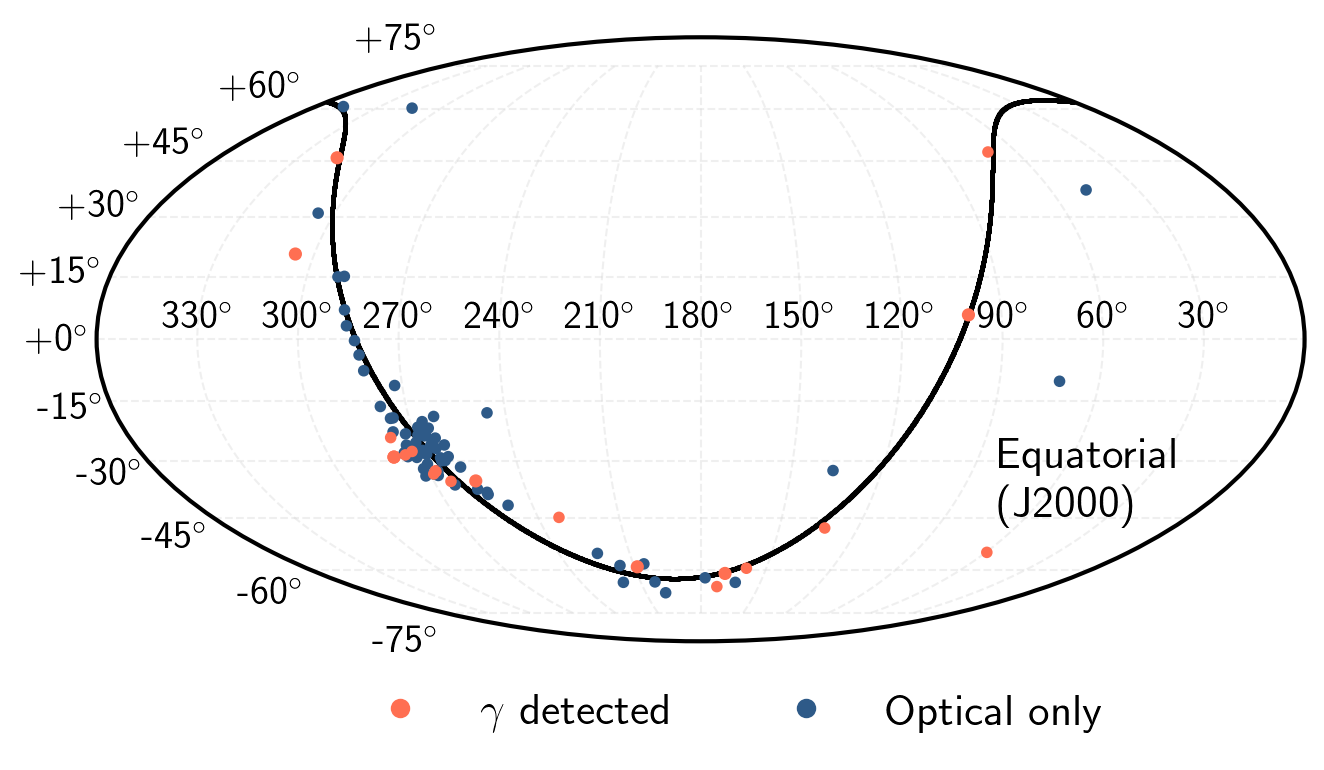

In [9]:
fig = plt.figure(figsize=(8,4), dpi=200, facecolor='w')

gplane = SkyCoord(frame='galactic', b = np.zeros(5000)*u.degree, l = np.linspace(0.0, 360., 5000)*u.degree)
gplane_icrs = gplane.icrs
gcent = SkyCoord(frame='galactic', b = [0.0]*u.degree, l = [0.0]*u.degree)
gcent_icrs = gcent.icrs
cols = [sns.xkcd_rgb['orange pink'] if k is True else sns.xkcd_rgb['light navy blue'] for k in df['gamma']]
s = [14 if k is True else 10 for k in df['gamma']]

legend_els = [ Line2D([0], [0], marker='o', ls = '', color=sns.xkcd_rgb['orange pink'], label=r'$\gamma$ detected'),
              Line2D([0], [0], marker='o', ls = '', color=sns.xkcd_rgb['light navy blue'], label='Optical only')]

ax = fig.add_subplot(111, projection='mollweide')
ax.grid(True, alpha = 0.35, zorder=1, ls = '--')

ax.scatter(-1*equatorial.ra.wrap_at('360d').radian + np.pi, equatorial.dec.radian, zorder=20, s = s, c = cols)
ax.scatter(-1*gamma_coords.ra.wrap_at('360d').radian + np.pi, gamma_coords.dec.radian, zorder=20, s = s, c = sns.xkcd_rgb['orange pink'])

ax.scatter(-1.*gplane_icrs.ra.wrap_at('360d').radian + np.pi, gplane_icrs.dec.radian, zorder=10, c = 'k', s = 0.5)

ax.set_xticklabels(["{:.0f}".format(v) + r'$^{\circ}$' for v in np.linspace(330., 30., 11)], fontsize = 14)
ax.set_yticklabels(["{:+.0f}".format(v) + r'$^{\circ}$' for v in np.linspace(-75., 75., 11)], fontsize = 14)
plt.text(110.*np.pi / 180., -45 * np.pi / 180, 'Equatorial\n(J2000)')
ax.legend(loc=(0.2, -0.18), handles=legend_els, ncol = 2, frameon=False)
#plt.savefig('/home/apizzuto/public_html/novae/skymap_all_novae.png', dpi=200, bbox_inches='tight')
plt.show()

In [12]:
print df.columns

Index([u'Name', u'$l$', u'$b$', u'Peak Time', u'$\Delta T$', u'Peak', u'$t_2$',
       u'TS$_{max}$', u'Flux', u'Reference', u'ra', u'dec', u'gamma'],
      dtype='object')


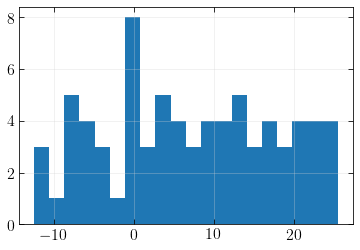

In [17]:
plt.hist(df[u'$\Delta T$'], bins = 20)
plt.show()

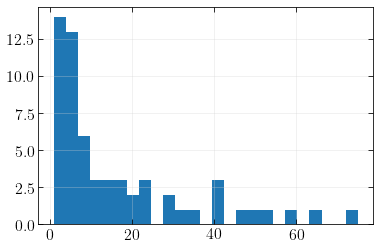

In [51]:
plt.hist(df[u'$t_2$'][~np.isnan(df['$t_2$'])], bins = 25)
plt.show()

In [3]:
from skylab.llh_models import EnergyLLH

In [4]:
?EnergyLLH()